In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
# Reading the data from excel file
df = pd.read_excel("Solar_Energy.xlsx")
df.head()

,url,headline,body,author_name,date
0,solarpowerworldonline.com/2021/10/californias-...,California’s C-10 solar + storage licensing re...,"Yesterday, the Attorney General of California ...",Kelsey Misbrener,2021-10-05
1,renewableenergyworld.com/wind-power/the-worlds...,The world’s most powerful offshore wind turbin...,"[Follow @EngelsAngle] Dogger Bank A, B, and C ...",John Engel,2021-10-05
2,renewableenergyworld.com/news/german-governmen...,German government investing $115M in renewable...,The German government has announced that it wi...,rodw,2021-10-05
3,renewableenergyworld.com/baseload/bitfarms-exp...,Bitfarms expands Québec mining operations with...,"Bitfarms Ltd., a Bitcoin mining company, annou...",Elizabeth Ingram,2021-10-05
4,renewableenergyworld.com/wind-power/europes-of...,Europe’s offshore wind to green hydrogen plan ...,[Follow @EngelsAngle] Europe’s offshore wind t...,John Engel,2021-10-05


1. Find total volume of the articles

In [3]:
# Assuming the volume refers to the count of articles present in the dataset
print("Total volume of articles is", df.shape[0])

# Assuming the volume refers to the memory used by the dataframe in computer
print(df.memory_usage(index=True).sum())

Total volume of articles is 278
11248


2. Find the total number of unique authors in the article.

In [4]:
print("Count of unique authors is", df.nunique(axis=0)['author_name'])

Count of unique authors is 60


3. In how many articles is the word "solar" (case insensitive) mentioned?

In [5]:
# Approach 1: Counting the articles which have 'solar' in the headlines or body of the article
df1 = pd.DataFrame()
df1['Article'] = df["headline"] + df["body"]
result = df1.loc[df1['Article'].str.contains("solar", case = False)]
print("Total number of occurances of solar in entire text", result.shape[0])

Total number of occurances of solar in entire text 225


In [6]:
# Approach 2: Counting only the body of the article for the search word 'solar'
body_check = df.loc[df["body"].str.contains("solar", case = False)]
print("Number of articles which mentioned the word 'solar' is", body_check.shape[0])

Number of articles which mentioned the word 'solar' is 224


4. Find the total number of articles each author has written.

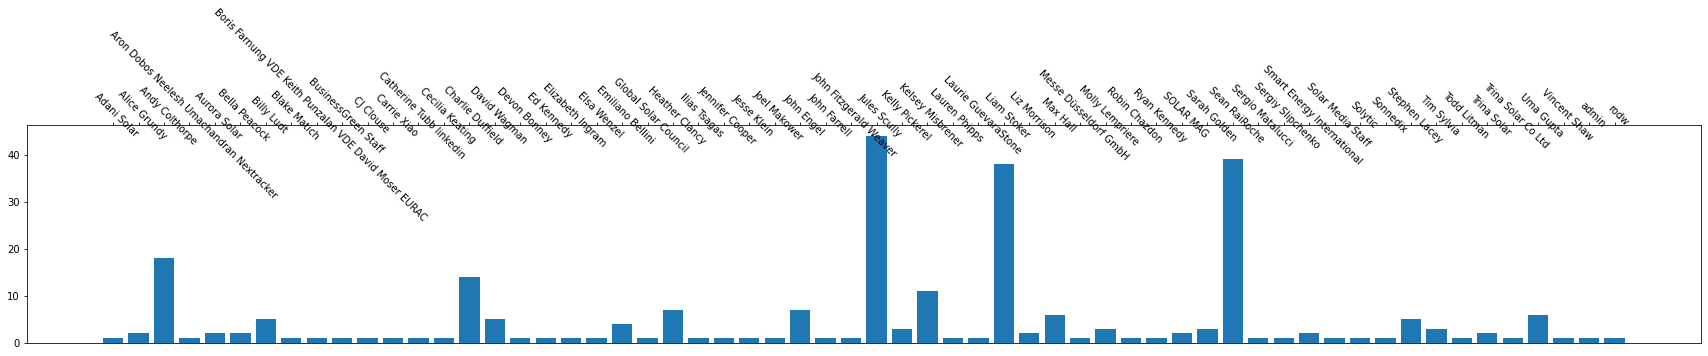

In [7]:
# Number of articles by each author
plt.figure(figsize = (30,4))
plt.bar(df.groupby("author_name").size().index, df.groupby("author_name").size())
plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
plt.xticks(rotation=-45, wrap = True)
plt.show()

5. Add 3 columns and extract the quarter, month and year from date.

In [8]:
df['quarter'] = df.date.dt.quarter
df['month'] = df.date.dt.month
df['year'] = df.date.dt.year
df

,url,headline,body,author_name,date,quarter,month,year
0,solarpowerworldonline.com/2021/10/californias-...,California’s C-10 solar + storage licensing re...,"Yesterday, the Attorney General of California ...",Kelsey Misbrener,2021-10-05,4,10,2021
1,renewableenergyworld.com/wind-power/the-worlds...,The world’s most powerful offshore wind turbin...,"[Follow @EngelsAngle] Dogger Bank A, B, and C ...",John Engel,2021-10-05,4,10,2021
2,renewableenergyworld.com/news/german-governmen...,German government investing $115M in renewable...,The German government has announced that it wi...,rodw,2021-10-05,4,10,2021
3,renewableenergyworld.com/baseload/bitfarms-exp...,Bitfarms expands Québec mining operations with...,"Bitfarms Ltd., a Bitcoin mining company, annou...",Elizabeth Ingram,2021-10-05,4,10,2021
4,renewableenergyworld.com/wind-power/europes-of...,Europe’s offshore wind to green hydrogen plan ...,[Follow @EngelsAngle] Europe’s offshore wind t...,John Engel,2021-10-05,4,10,2021
...,...,...,...,...,...,...,...,...
273,energy-storage.news/news/amazon-invests-in-ess...,Amazon invests in ESS battery analytics startu...,Amazon has invested in India-headquartered bat...,Andy Colthorpe,2021-07-02,3,7,2021
274,pv-tech.org/trina-vertex-series-sets-new-modul...,Trina Vertex series sets new module aperture e...,Trina Solar has achieved a record aperture mod...,Jules Scully,2021-07-02,3,7,2021
275,pv-magazine.com/2021/07/02/trina-solar-achieve...,Trina Solar achieves 23.03% efficiency for 210...,Chinese module maker Trina Solar has announced...,Emiliano Bellini,2021-07-02,3,7,2021
276,greenbiz.com/article/startup-helping-volvo-tra...,The startup helping Volvo trace EV battery mat...,The past six months have brought a flood of mo...,Heather Clancy,2021-07-01,3,7,2021


6. Add another column and extract Domain from the URL.

In [9]:
df['domains'] = df.url.str.extract('([^\/]+)')
df

,url,headline,body,author_name,date,quarter,month,year,domains
0,solarpowerworldonline.com/2021/10/californias-...,California’s C-10 solar + storage licensing re...,"Yesterday, the Attorney General of California ...",Kelsey Misbrener,2021-10-05,4,10,2021,solarpowerworldonline.com
1,renewableenergyworld.com/wind-power/the-worlds...,The world’s most powerful offshore wind turbin...,"[Follow @EngelsAngle] Dogger Bank A, B, and C ...",John Engel,2021-10-05,4,10,2021,renewableenergyworld.com
2,renewableenergyworld.com/news/german-governmen...,German government investing $115M in renewable...,The German government has announced that it wi...,rodw,2021-10-05,4,10,2021,renewableenergyworld.com
3,renewableenergyworld.com/baseload/bitfarms-exp...,Bitfarms expands Québec mining operations with...,"Bitfarms Ltd., a Bitcoin mining company, annou...",Elizabeth Ingram,2021-10-05,4,10,2021,renewableenergyworld.com
4,renewableenergyworld.com/wind-power/europes-of...,Europe’s offshore wind to green hydrogen plan ...,[Follow @EngelsAngle] Europe’s offshore wind t...,John Engel,2021-10-05,4,10,2021,renewableenergyworld.com
...,...,...,...,...,...,...,...,...,...
273,energy-storage.news/news/amazon-invests-in-ess...,Amazon invests in ESS battery analytics startu...,Amazon has invested in India-headquartered bat...,Andy Colthorpe,2021-07-02,3,7,2021,energy-storage.news
274,pv-tech.org/trina-vertex-series-sets-new-modul...,Trina Vertex series sets new module aperture e...,Trina Solar has achieved a record aperture mod...,Jules Scully,2021-07-02,3,7,2021,pv-tech.org
275,pv-magazine.com/2021/07/02/trina-solar-achieve...,Trina Solar achieves 23.03% efficiency for 210...,Chinese module maker Trina Solar has announced...,Emiliano Bellini,2021-07-02,3,7,2021,pv-magazine.com
276,greenbiz.com/article/startup-helping-volvo-tra...,The startup helping Volvo trace EV battery mat...,The past six months have brought a flood of mo...,Heather Clancy,2021-07-01,3,7,2021,greenbiz.com
